In [51]:
from scipy.integrate import quad
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import signal

#Все необходимое
def f(x):
    return x*x*np.cos(x)

def w():
    return 2*math.pi/2

def printGraphic(name, kn):
    plt.title(name)
    plt.plot(range(len(kn)) , kn,'g')
    plt.grid(True)
    plt.show()
    
N = 100

int_start = 0
int_end = 1

precision =100


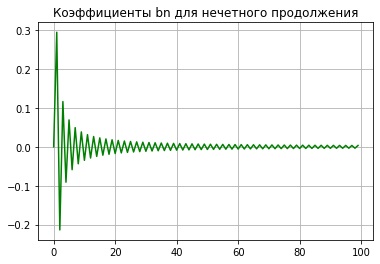

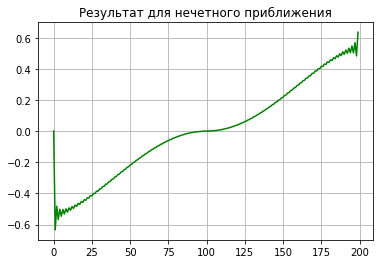

In [52]:
#Продолжаем нечетным образом f(x) = -f(-x)
#Ищем b_n

def integrateFuncSin(x,n):
    return f(x)*np.sin(n*x*w())

b_n = []

for i in range(N):
    b_n.append(2 / int_end * quad(integrateFuncSin, int_start, int_end, args=(i))[0])
printGraphic('Коэффициенты bn для нечетного продолжения' ,b_n)

#проверка
def f_sin(x):
    result = 0
    for n in range(1,N):
        result += b_n[n] * np.sin(n*x*w())
    return result
        

f_x_sin = []
for i in range(-int_end*precision,int_end*precision):
    f_x_sin.append(f_sin(i/precision))

printGraphic('Результат для нечетного приближения' ,f_x_sin)


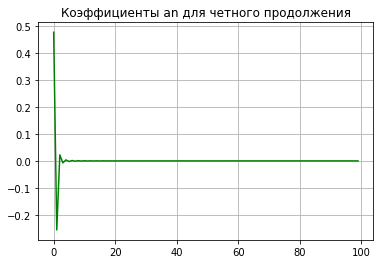

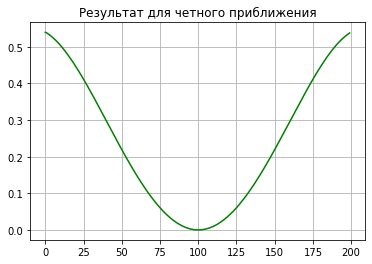

In [53]:
#Продолжаем четным образом f(x) = f(-x)
#Ищем a_n

def integrateFuncCos(x,n):
    return f(x)*np.cos(n*x*w())

a_n = []

for i in range(N):
    a_n.append(2 / int_end * quad(integrateFuncCos, int_start, int_end, args=(i))[0])

printGraphic('Коэффициенты an для четного продолжения' ,a_n)

#проверка функции четной

def f_cos(x):
    result = a_n[0] / 2;
    for n in range(1,N):
        result += a_n[n] * np.cos(n*x*w())
    return result
        
f_x_cos = []
for i in range(-int_end*precision,int_end*precision):
    f_x_cos.append(f_cos(i/precision))

printGraphic('Результат для четного приближения' ,f_x_cos)

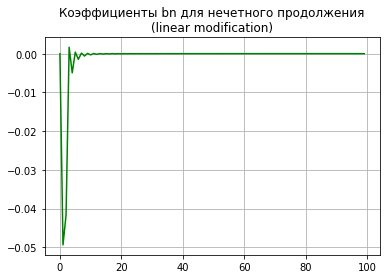

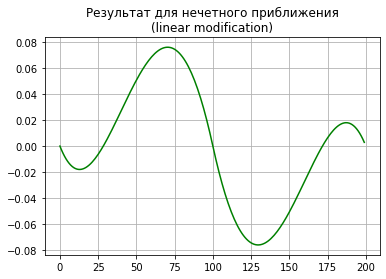

In [54]:
#Линейное преобразование  f(x) -> f(x) - f(0) - (f(1) - f(0))
#Продолжаем нечетным образом f(x) =- f(-x)
#Ищем c_n

def f_mod(x):
    return f(x) - f(int_start) - ((f(int_end) - f(int_start)) * x) / int_end

def integrateFuncSinMod(x,n):
    return f_mod(x)*np.sin(n*x*w())

c_n = []

for i in range(N):
    c_n.append(2 / int_end *quad(integrateFuncSinMod, int_start, int_end, args=(i))[0])

printGraphic('Коэффициенты bn для нечетного продолжения\n(linear modification)' ,c_n)

#проверка
def f_sin_mod(x):
    result = 0
    for n in range(1,N):
        result += c_n[n] * np.sin(n*x*w()) 
    return result
        

f_x_sin_mod = []
for i in range(-int_end*precision,int_end*precision):
    f_x_sin_mod.append(f_sin_mod(i/precision))

printGraphic('Результат для нечетного приближения\n(linear modification)' ,f_x_sin_mod)

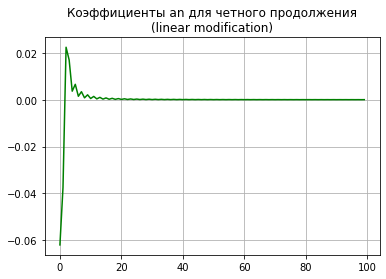

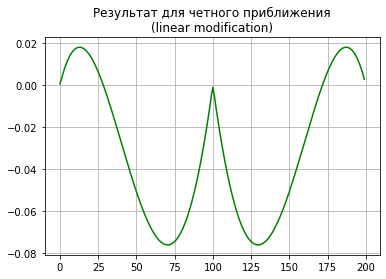

In [55]:
#Линейное преобразование  f(x) -> f(x) - f(0) - (f(1) - f(0))
#Продолжаем четным образом f(x) = f(-x)
#Ищем d_n

def integrateFuncCosMod(x,n):
    return f_mod(x)*np.cos(n*x*w())

d_n = []

for i in range(N):
    d_n.append(2 / int_end *quad(integrateFuncCosMod, int_start, int_end, args=(i))[0])

printGraphic('Коэффициенты an для четного продолжения\n(linear modification)' ,d_n)

#проверка
def f_cos_mod(x):
    result = d_n[0] / 2;
    for n in range(1,N):
        result += d_n[n] * np.cos(n*x*w()) 
    return result
        

f_x_cos_mod = []
for i in range(-int_end*precision,int_end*precision):
    f_x_cos_mod.append(f_cos_mod(i/precision))

printGraphic('Результат для четного приближения\n(linear modification)' ,f_x_cos_mod)

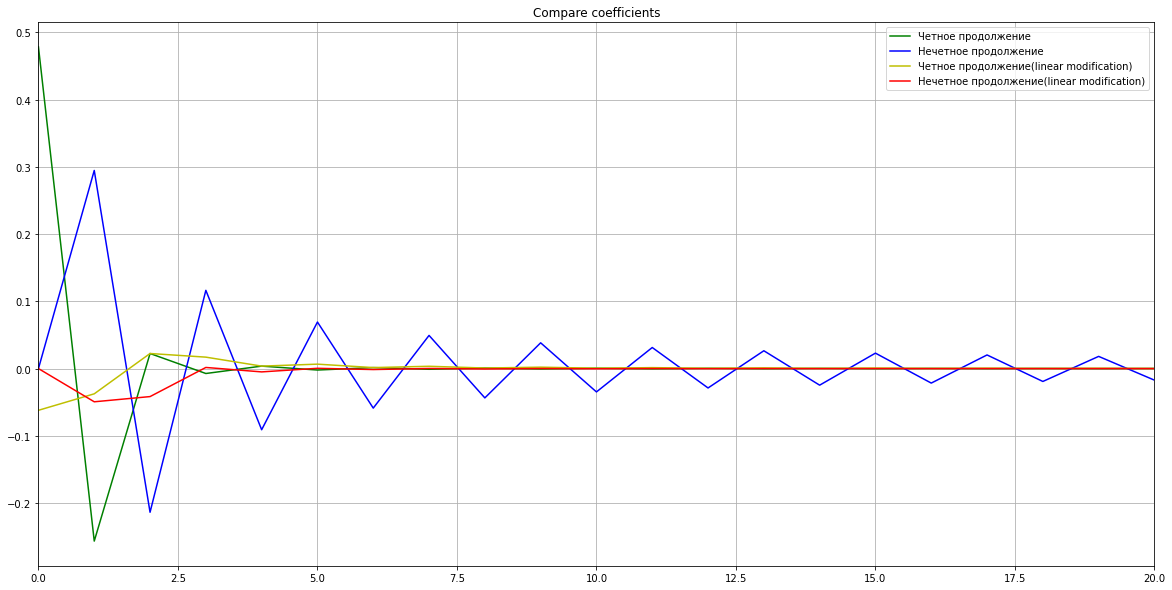

In [70]:
#Сравнения сходимости коэффициентов

def printGraphicCompare(name, a_n1,b_n1,a_n2,b_n2):
    plt.figure(figsize=(20,10))
    plt.xlim (0, 20)
    plt.title(name)
    ln = range(len(a_n1))
    plt.plot(ln , a_n1,'g', label= "Четное продолжение")
    plt.plot(ln , b_n1,'b', label= "Нечетное продолжение")
    plt.plot(ln , a_n2,'y', label= "Четное продолжение(linear modification)")
    plt.plot(ln , b_n2,'r', label= "Нечетное продолжение(linear modification)")
    plt.legend()
    plt.grid(True)
    plt.show()

printGraphicCompare('Compare coefficients',a_n,b_n,d_n,c_n);